$$\normalsize \textbf{This Python program is to train a Supervised Learning Model to predict the Breast Cancer}$$

$$\small \textbf{The CopyRight @ Phuong V. Nguyen}$$

This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\underline{\textbf{Main Contents}}$$

# 1. Preparing problem

## 1.1. Loading libraries 

In [1]:
# 1. Algorithms for handling and decribing data
%matplotlib notebook
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
#from sklern.feature_selector import FeatureSelector

In [2]:
# 2. Trained Machine Learning for the Classification

In [3]:
## 2.1. Linear Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
## 2.2. Non-linear Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
## 2.3. Advanced  Algorithms
### 2.3.1. Boosting Methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
### 2.3.2. Bagging Methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
## 2.3.3. Combining several Classification Algorithms
from sklearn.ensemble import VotingClassifier

In [6]:
# 3. Algorithms for the model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## 1.2. Loading dataset

In [7]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer() 
#data

In [8]:
used_data=pd.DataFrame(data=np.c_[data['data'], data['target']],
                          columns=np.append(data['feature_names'], ['target']))
#used_data

In [ ]:
data.DESCR

# 2. Summarizing data

## 2.1. Descriptive Statistics

### 2.1.1 Shape of data

In [9]:
print(used_data.shape)

(569, 31)


### 2.1.2. Peek at the data

In [ ]:
used_data.head(20) 
#print(used_data.head(20))

### 2.1.3. Statisical Summary

In [ ]:
used_data.describe()
#print(used_data.describe())

### 2.1.4. Checking features

In [ ]:
used_data.columns

In [ ]:
#used_data.groupby('mean radius').size()

## 2.2. Data Visualization

### 2.2.1. Univeriate Plots

In [ ]:
#used_data['mean radius'].plot(kind='box',subplots=True, layout=(1,1),sharex=False, sharey=False)
plt.figure(1)
plt.boxplot(used_data['mean radius'],  notch=None, vert=0, whis=1.5,patch_artist=True)
plt.title('Box and Whisker Plots')
plt.xlabel('Mean of Radius')
#plt.ylabel('The Unit of Measurement ')
plt.grid()


In [ ]:
#used_data.hist()
plt.figure(2)
plt.hist(used_data['mean radius'],bins=100,facecolor='g', alpha=0.60)#, density=True)
plt.title('The Histogram of the Mean of Radius',fontsize=15)
plt.xlabel('The Mean of Radius', fontsize=10)
plt.ylabel('The frequency',fontsize=10)
#plt.ylabel('The Probability',fontsize=10) # Using if 'density =True' is specified
plt.autoscale(enable=True, axis='both',tight=True)
plt.grid()

### 2.2.2. Multivariate Plots

In [ ]:
#plt.figure(2)
scatter_matrix(used_data)
plt.show()
#pd.plotting.scatter_matrix(used_data)

# 3. Preparing Data

## 3.1. Data Cleaning

## 3.2. Feature Selections

## 3.3. Data Tranforms

# 4. Evaluating Algorithms

## 4.1. Split-out Validation Dataset

In [9]:
y=used_data.iloc[:,-1] #used_data['target']  
X=used_data.iloc[:,0:30]#used_data.drop(['target'], axis=1)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

## 4.2. Building 11 Competed Classification Supervised Learning Models

In [20]:
# Building Eleven classification Supervised Learning Model with all default setting
models=[]
models.append(('LOR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis())) 
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
#models.append(('', ()))

## 4.3. Comparing Algorithms

### 4.3.1. Spot Check Algorithms Using the Scoring Criteria

In [21]:
# Defining some varibale for printing the result
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
bold = "\033[1m"
reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

In [ ]:
results=[]
names=[]
print(bold + Green+ '\n The Spot Check Result of 11 Competed Models \n'.center(135,'-')+End)
for name, model in models:
    kFold=KFold(n_splits=70, random_state=7)
    cv_results=cross_val_score(model, X_train,y_train,cv=kFold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
print(bold+ Green +"The End".center(44,'-'))

##### How to hide the running procedure for the cross_val_score algorithm?

### 4.3.2. Spot Check Algorithms Using the Visualisation

<IPython.core.display.Javascript object>


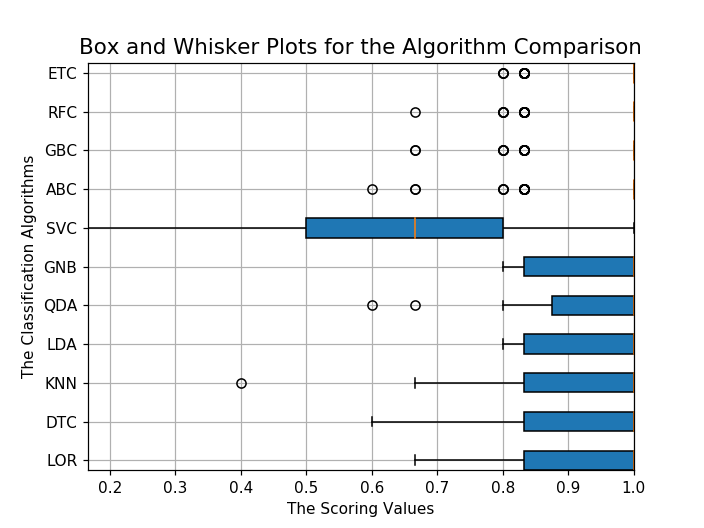

C:\Users\Thilo  Kroeger\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [23]:
fig=plt.figure(4)
plt.boxplot(results,vert=0,patch_artist=True)
ax=fig.add_subplot(111)
ax.set_yticklabels(names)
plt.title('Box and Whisker Plots for the Algorithm Comparison',fontsize=14)
plt.xlabel('The Scoring Values')
plt.ylabel('The Classification Algorithms')
plt.autoscale(enable=True,axis='both',tight=True)
plt.grid()

$$\large \textbf{Among eleven algorithms above, we choose the LDA Algorithm}$$

Because the LDA algorithm delivers the highest score of prediction with the lowest number of outlier of 2. Other algorithms such as GBC, ABC, and LOR also provide an equal score of the prediction as to the LDA algorithm. However, these three algorithms have a higher number of an outlier. 

We are noting that by using the Voting Algorithms, we can combine several classification algorithms to compete with the LDA one. Accordingly, GBC, ABC, LOR can be combined to form a new algorithm. 

$\underline{\text{Noting that:}}$ It is worth noting that the above comparison is only the spot check. Indeed, all competed models are not at their optimal setting. Thus, it would be better when comparing all competed model at their optimal setting. 

# 5. Improving Accuracy

In this section, we will focus on improving the quality of the LDA algorithm in making the prediction. 

The fundamental mathematical formula, which is used to compute the condition probability $P(y=k|X)$, is the Bayes's rule:

$$P(y=k|X)=\frac{P(X|y=k)*P(y=k)}{P(X)}\propto P(y=k)*P(X|y=k)$$

On the other hand, for both linear and quadratic discriminant analysis, the condition probability $P(X|y=k)$ is modeled as the multivariate Gaussian density. Thus, the condition probability $P(y=k|X)$ will be calculated as follows.

$$
\begin{align}
P(y=k|X)\propto & P(y=k)*P(X|y=k)\\
=& P(y=k)*\frac{1}{(2\pi)^{d/2}|\sum_{k} |^{1/2}}*\exp\Big[-\frac{(X-\mu_{k})*\sum_{k}^{-1}(X-\mu_{k})}{2} \Big]
\end{align}
$$

It would be worth noting that three methods can calculate the covariance matrix,$(\sum_{k})$, in the LDA algorithm.

1. '$svd$': Sigular value decomposition does not compute the covariance matrix,$(\sum_{k})$. Hence, this method is recommended for the data with a large number of features.

2. '$lsqr$': Least Squares Solution can be combined with shrinkage.

3. '$eigen$': Eigenvalue decomposition also can be combined with shrinkage.

Therefore, we will compare these three LDA algorithms above.

## 5.1. The LDA Algorithm with the Singular Value Decomposition (SVD)

### 5.1.1. Define the LDA Algorithm with the SVD Solver

In [47]:
lda_svd=LinearDiscriminantAnalysis(solver='svd',shrinkage=None, 
                               priors=None, n_components=None, store_covariance=False, tol=0.0001)

### 5.1.2. Training the model

In [48]:
train_lda_svd=lda_svd.fit(X_train,y_train)

### 5.1.3. Making the Prediction and Model Evaluation

#### 5.1.3.1. Based on the train data

In [ ]:
# Making the prediction
y_predic_lda_svd_train=train_lda_svd.predict(X_train)
## Pringting the table of the Model Evaluation Based on the test data
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_train,y_predic_lda_svd_train))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_train,y_predic_lda_svd_train)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_train,y_predic_lda_svd_train,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

#### 5.1.3.2. Based on the test data

In [49]:
## Making the predition on the test data
y_predic_lda_svd=train_lda_svd.predict(X_test)
## Printing the evaluation result
print(bold + Green+ '\n The LDA-SVD Model Evaluation Report Based on the Test Data \n'.center(180,'-')+End)
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_test,y_predic_lda_svd))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_test,y_predic_lda_svd)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_test,y_predic_lda_svd,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

-----------------------------------------------------------
 The LDA-SVD Model Evaluation Report Based on the Test Data 
-----------------------------------------------------------
1.The confusion matrix: 
 [[ 47   9]
 [  0 115]]
2.The accuracy score: 
 0.9473684210526315
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       1.00      0.84      0.91        56
   Breast Cancer       0.93      1.00      0.96       115

     avg / total       0.95      0.95      0.95       171

**************************The End **************************


In [50]:
## Computing the score with the decision_function technique 
y_predic_lda_svd_test_score=train_lda_svd.decision_function(X_test)

In [51]:
## Computing the true positive rate (tpr) and the false positve rate (fpr)
fpr_lda_svd_test,tpr_lda_svd_test,_=roc_curve(y_test,y_predic_lda_svd_test_score)

In [52]:
## Computing the area under the ROC curve
roc_auc_lda_svd_test=auc(fpr_lda_svd_test,tpr_lda_svd_test)

## 5.2. The LDA Algorithm with the Least Squares Solution (LSQR)

### 5.2.1. Define the LDA Algorithm with the LSQR

In [53]:
lda_lsqr=LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto', 
                               priors=None, n_components=None, store_covariance=True, tol=0.0001)

### 5.2.1. Training the model

In [54]:
train_lda_lsqr=lda_lsqr.fit(X_train,y_train)

### 5.2.1. Making the Prediction and Model Evaluation

#### 5.2.1.1. Based on the train data

In [ ]:
## Making the predition on the train data
y_predic_lda_lsqr_train=train_lda_lsqr.predict(X_train)
## Final Evaluation Based on the train data
print(bold + Green+ '\n The LDA-LSQR Model Evaluation Report Based on the Train Data\n'.center(185,'-')+End)
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_train,y_predic_lda_lsqr_train))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_train,y_predic_lda_lsqr_train)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_train,y_predic_lda_lsqr_train,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

#### 5.2.1.2. Based on the test data

In [55]:
## Making the predition on the train data
y_predic_lda_lsqr_test=train_lda_lsqr.predict(X_test)
## Final Evaluation Based on the train data
print(bold + Green+ '\n The LDA-LSQR Model Evaluation Report Based on the Test Data \n'.center(183,'-')+End)
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_test,y_predic_lda_lsqr_test))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_test,y_predic_lda_lsqr_test)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_test,y_predic_lda_lsqr_test,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

------------------------------------------------------------
 The LDA-LSQR Model Evaluation Report Based on the Test Data 
------------------------------------------------------------
1.The confusion matrix: 
 [[ 49   7]
 [  0 115]]
2.The accuracy score: 
 0.9590643274853801
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       1.00      0.88      0.93        56
   Breast Cancer       0.94      1.00      0.97       115

     avg / total       0.96      0.96      0.96       171

**************************The End **************************


In [56]:
## Computing the score with the decision_function technique 
y_predic_lda_lsqr_test_score=train_lda_lsqr.decision_function(X_test)
## Computing the true positive rate (tpr) and the false positve rate (fpr)
fpr_lda_lsqr_test,tpr_lda_lsqr_test,_=roc_curve(y_test,y_predic_lda_lsqr_test_score)
## Computing the area under the ROC curve
roc_auc_lda_lsqr_test=auc(fpr_lda_lsqr_test,tpr_lda_lsqr_test)
roc_auc_lda_lsqr_test

0.9934782608695651

## 5.3. The LDA Algorithm with the Eigenvalue Decomposition (eigen)

### 5.3.1. Define the LDA Algorithm with the Eigenvalue Decomposition

In [57]:
lda_eigen=LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto', 
                               priors=None, n_components=None, store_covariance=True, tol=0.0001)

### 5.3.2. Training the model

In [58]:
train_lda_eigen=lda_eigen.fit(X_train,y_train)

### 5.3.3. Making the Prediction and Model Evaluation

#### 5.3.3.1. Based on the train data

In [59]:
## Making the predition on the train data
y_predic_lda_eigen_train=train_lda_eigen.predict(X_train)
## Final Evaluation Based on the train data
print(bold + Green+ '\n The LDA-EIGEN Model Evaluation Report Based on the Train Data\n'.center(185,'-')+End)
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_train,y_predic_lda_eigen_train))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_train,y_predic_lda_eigen_train)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_train,y_predic_lda_eigen_train,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

-------------------------------------------------------------
 The LDA-EIGEN Model Evaluation Report Based on the Train Data
------------------------------------------------------------
1.The confusion matrix: 
 [[  0 156]
 [  0 242]]
2.The accuracy score: 
 0.6080402010050251
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       0.00      0.00      0.00       156
   Breast Cancer       0.61      1.00      0.76       242

     avg / total       0.37      0.61      0.46       398

**************************The End **************************


/Users/phuong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5.4. Comparing the LDA-SVD vs LDA-LSQR Algorithms by the AUC-ROC Curves

<IPython.core.display.Javascript object>


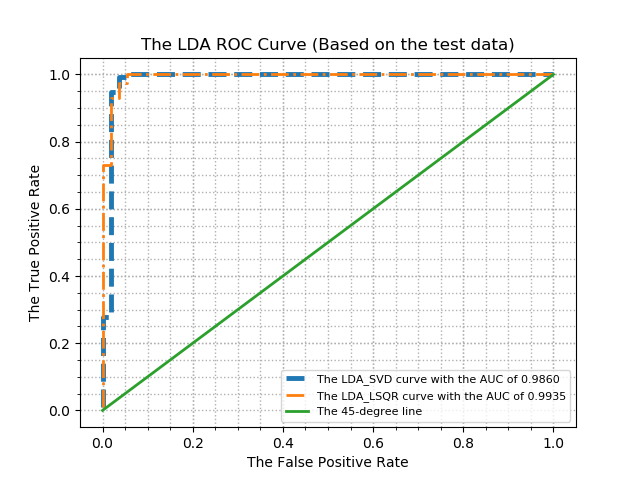

In [60]:
## Ploting the figure
%matplotlib notebook
#plt.figure(figsize=(8,5))
plt.plot(fpr_lda_svd_test,tpr_lda_svd_test,lw=3.5,linestyle='--',
         label='The LDA_SVD curve with the AUC of {:.4f}'.format(roc_auc_lda_svd_test))
plt.plot(fpr_lda_lsqr_test,tpr_lda_lsqr_test ,lw=2,linestyle='-.',
         label='The LDA_LSQR curve with the AUC of {:.4f}'.format(roc_auc_lda_lsqr_test))
plt.plot([0,1],[0,1],lw=2,linestyle='-',
        label='The 45-degree line')
plt.legend(loc='lower right', fontsize=8)
plt.title('The LDA ROC Curve (Based on the test data)',fontsize=12)
plt.xlabel('The False Positive Rate',fontsize=10)
plt.ylabel('The True Positive Rate',fontsize=10)
plt.grid(b=None,linestyle=':',which='both',linewidth=1) #'major', 'minor', 'both'
plt.minorticks_on()


The AUC-ROC curve shows that the LDA algorithm with the least square is the most effective model. 

# 6. Finalizing Model

In [61]:
model=LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto', 
                               priors=None, n_components=None, store_covariance=True, tol=0.0001)
model.fit(X_train,y_train)
y_predic_lda_lsqr_test=model.predict(X_test)
print(bold + Green+ '\n The LDA-LSQR Model Evaluation Report Based On The Test Data  \n'.center(183,'-')+End)
print(bold + Blue+'1.The confusion matrix: \n'+reset, confusion_matrix(y_test,y_predic_lda_lsqr_test))
print(bold + Blue+'2.The accuracy score: \n'+reset,format(accuracy_score(y_test,y_predic_lda_lsqr_test)))
print(bold + Blue+'3.The table of the classfication report \n'+reset,classification_report(y_test,y_predic_lda_lsqr_test,target_names=['No Breast Cancer','Breast Cancer']))
print(bold + Green + 'The End '.center(60,'*')+End)

------------------------------------------------------------
 The LDA-LSQR Model Evaluation Report Based On The Test Data  
-----------------------------------------------------------
1.The confusion matrix: 
 [[ 49   7]
 [  0 115]]
2.The accuracy score: 
 0.9590643274853801
3.The table of the classfication report 
                   precision    recall  f1-score   support

No Breast Cancer       1.00      0.88      0.93        56
   Breast Cancer       0.94      1.00      0.97       115

     avg / total       0.96      0.96      0.96       171

**************************The End **************************


# 7. Sentitive Analysis

##### This section is to find which features/signals play the most crucial role in diagnostic Breast Cancer.

In [62]:
model1 = ExtraTreesClassifier()
model1.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model1.feature_importances_, X.columns)
feat_importances

[0.04095299 0.01919852 0.06147685 0.0687429  0.01028883 0.03000393
 0.02489881 0.02724222 0.00713515 0.00955645 0.01488197 0.00555228
 0.03482779 0.00933365 0.00558173 0.00364081 0.00679863 0.00477533
 0.00470848 0.00736047 0.1460878  0.03320403 0.08306906 0.09716126
 0.01725673 0.01318848 0.03848699 0.1501998  0.01340257 0.01098546]


mean radius                0.040953
mean texture               0.019199
mean perimeter             0.061477
mean area                  0.068743
mean smoothness            0.010289
mean compactness           0.030004
mean concavity             0.024899
mean concave points        0.027242
mean symmetry              0.007135
mean fractal dimension     0.009556
radius error               0.014882
texture error              0.005552
perimeter error            0.034828
area error                 0.009334
smoothness error           0.005582
compactness error          0.003641
concavity error            0.006799
concave points error       0.004775
symmetry error             0.004708
fractal dimension error    0.007360
worst radius               0.146088
worst texture              0.033204
worst perimeter            0.083069
worst area                 0.097161
worst smoothness           0.017257
worst compactness          0.013188
worst concavity            0.038487
worst concave points       0

<IPython.core.display.Javascript object>


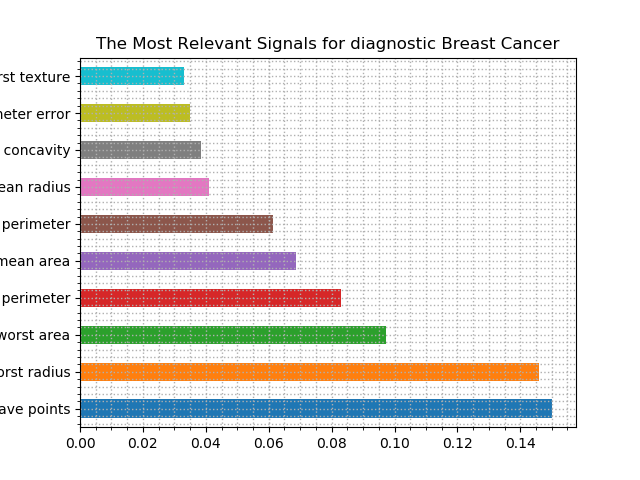

In [70]:
%matplotlib notebook
plt.figure(5)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('The Most Relevant Signals for diagnostic Breast Cancer')
plt.grid(b=None,linestyle=':',which='both',linewidth=1) #'major', 'minor', 'both'
plt.minorticks_on()